In [1]:
#Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [2]:
#Load Dataset
df = pd.read_csv(r"C:\Users\karis\Downloads\student_info.csv")

In [3]:
#Fill missing values with mean
df2 = df.fillna(df.mean(numeric_only=True))

In [4]:
#Feature and target selection
X = df2[["study_hours"]] #Ensure X is 2d for model compatibility
y = df2["student_marks"]

In [5]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
#Create and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
#Save the model
joblib.dump(lr, "Student_mark_prediction_model.pk1")

['Student_mark_prediction_model.pk1']

In [8]:
#Load the trained model
model = joblib.load("Student_mark_prediction_model.pk1")

In [9]:
#Input: Ask user for study hours
study_hours = float(input("Enter the number of study hours:"))

Enter the number of study hours: 5


In [10]:
#Check for valid input
if study_hours > 0:
    #predict with reshaped input
    predicted_value = model.predict(np.array([[study_hours]]))[0]
    print(f"Predicted Marks for {study_hours} study hours: {predicted_value:.2f}")
else:
    print("Please enter a valid number of study hours greater than 0.")

Predicted Marks for 5.0 study hours: 70.15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


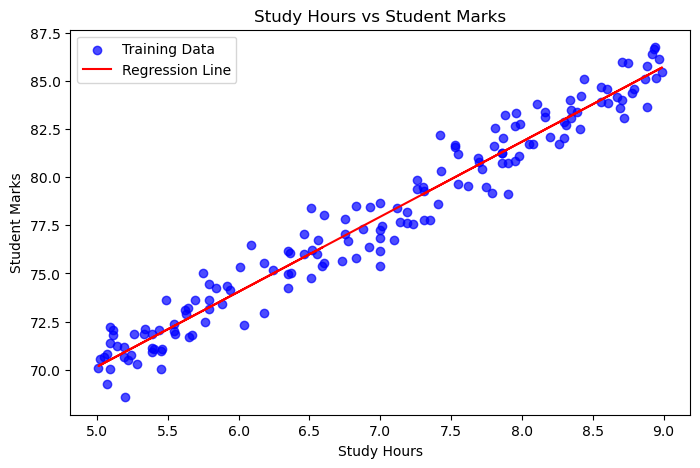

In [12]:
#Visualizing Predicitions
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, label="Training Data", color="blue", alpha=0.7)
plt.plot(X_train, lr.predict(X_train), color="red", label="Regression Line")
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("Study Hours vs Student Marks")
plt.legend()
plt.show()